Analysis plan 
1. convert fMRI to fsaverage space 
2. extract time series from seeds 
3. correlate seed time series with rest of the brain 
4. convert to fisher-z
5. write a correlation image

6. correlate seed time series with time series from glasser atlas
7. convert to fisher-z scores

8. test seed correlation differences between 2 conditions on voxels & parcels
9. find peaks in the prefrontal cortex  


In [8]:
from neuromaps.transforms import mni152_to_fsaverage
from neuromaps.images import load_data

import os 
import numpy as np
from nibabel.freesurfer.io import read_label
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import subprocess


In [9]:
BASE_PATH = os.path.dirname(os.getcwd())
label = read_label(BASE_PATH + '/seeds/TMS10mm-lh.label')


In [16]:
FMRI_PATH = '/Users/laurituominen/Documents/Research/FDGPET/petanalysis/test_fMRI/'
f = 'sub-tbsfdg001_ses-002_task-rest_space-MNI152NLin6Asym_res-2_desc-denoised_bold.nii.gz'
full_file = FMRI_PATH + f
output = FMRI_PATH + 'lh.preprocessed.f.nii.gz'

In [21]:
cmd = [
    "mri_vol2surf",
    "--mov", full_file,
    "--mni152reg",
    "--hemi", "lh",
    "--surf", "white",
    "--o", output
]

# Run the command
result = subprocess.run(cmd, capture_output=True, text=True)

#print(result.stdout)
#print(result.stderr)

srcvol = /Users/laurituominen/Documents/Research/FDGPET/petanalysis/test_fMRI/sub-tbsfdg001_ses-002_task-rest_space-MNI152NLin6Asym_res-2_desc-denoised_bold.nii.gz
srcreg = /Applications/freesurfer/average/mni152.register.dat
srcregold = 0
srcwarp unspecified
surf = white
hemi = lh
reshape = 0
interp = nearest
float2int = round
GetProjMax = 0
INFO: float2int code = 0
niiRead(): detected input as 64 bit double, reading in as 32 bit float
Done loading volume
INFO: This REGISTER_DAT transform is valid only for volumes between  COR types with c_(r,a,s) = 0.
Input reg is register.dat
         from that listed in the registration file (1,1,1)
-------- original matrix -----------
 0.99753  -0.00732   0.01760   0.95709;
-0.01296  -0.00926   0.99706  -17.81596;
-0.01460  -1.00094   0.00244  -18.54964;
 0.00000   0.00000   0.00000   1.00000;
-------- original matrix -----------
Reading surface /Applications/freesurfer/subjects/fsaverage/surf/lh.white
Done reading source surface
Mapping Source Vo

In [22]:
img_L = load_data(output)
awf = np.mean(img_L[label,:],0)

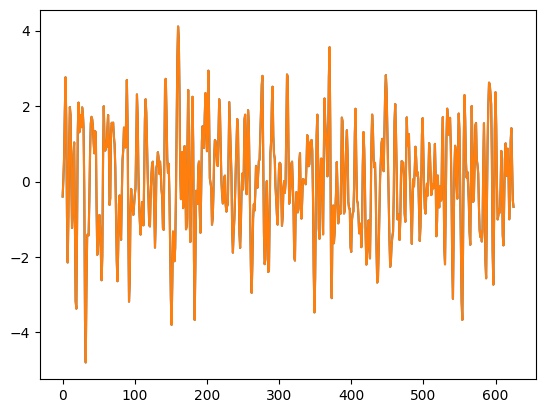

In [25]:
plt.plot(awf);
plt.plot(dat)

In [4]:
f_fsaverage = mni152_to_fsaverage(full_file, '164k')
lh , rh = f_fsaverage
lh_data = np.array(lh.agg_data())
print(lh_data.shape)

(626, 163842)


In [24]:
dat = pd.read_csv('/Users/laurituominen/Documents/Research/FDGPET/petanalysis/test_fMRI/out.dat', header=None)
dat = list(dat[0])
#img_L = load_data(FMRI_PATH + '/test.mgh')

In [ ]:
awf = np.mean(img_L[label,:],0)

In [ ]:
awf.shape

In [ ]:
seedwf = np.mean(lh_data[:,label],1)
seedwf.shape

In [ ]:
plt.plot(dat)
plt.plot(awf);

pearsonr(dat, awf)